In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib
from add_preprocessing import load_and_prepare_data, create_preprocessor

# Load and prepare data
X, y = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
preprocessor = create_preprocessor(X)

# Stratified train-test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Build better model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=300,          # More trees
        learning_rate=0.05,         # Smaller steps
        max_depth=5,                # Medium depth
        min_samples_split=200,      # Regularization
        min_samples_leaf=30,        # Regularization
        subsample=0.8,              # Randomness for less overfitting
        random_state=42
    ))
])

# Train the model
model.fit(X_train, y_train)

# Export the model
joblib.dump(model, "../models/gradient_boost_model.pkl")
print("Gradient Boosting model trained and saved!")

/Users/alper/Desktop/cse2600/model_codes/add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Gradient Boosting model trained and saved!


/Users/alper/Desktop/cse2600/model_codes/add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Loaded raw data and split into train/test.
✅ Loaded hyperparameterized Gradient Boosting model.

✅ Gradient Boosting Model Evaluation
----------------------------------------
Accuracy: 0.8700
ROC AUC Score: 0.8926

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.44      0.58      4361
           1       0.87      0.98      0.92     16750

    accuracy                           0.87     21111
   macro avg       0.87      0.71      0.75     21111
weighted avg       0.87      0.87      0.85     21111



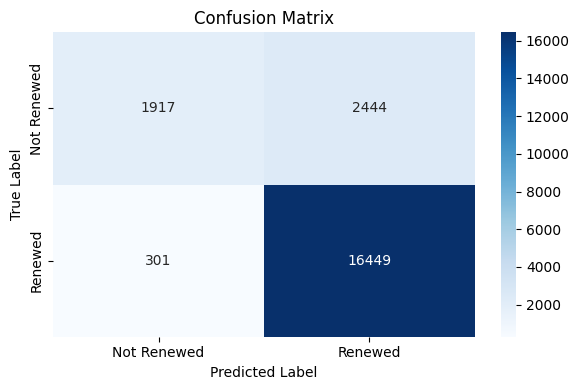

In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
from sklearn.model_selection import train_test_split
from add_preprocessing import load_and_prepare_data

# Load raw data
X_raw, y_raw = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42
)
print("Loaded raw data and split into train/test.")

# Load the trained model
model = joblib.load("../models/gradient_boost_model.pkl")
print("Loaded hyperparameterized Gradient Boosting model.")

# Predict on test set
y_pred = model.predict(X_test_raw)
y_prob = model.predict_proba(X_test_raw)[:, 1]

# Evaluation
print("\nGradient Boosting Model Evaluation")
print("-" * 40)
print(f"Accuracy: {accuracy_score(y_test_raw, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_raw, y_prob):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_raw, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Renewed', 'Renewed'],
            yticklabels=['Not Renewed', 'Renewed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()